<a href="https://colab.research.google.com/github/Abhinayy27/Emoticon_detection_nlp/blob/main/emoticon_detection_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/ML/Emoticon Dataset (NLP)/train.txt'
df = pd.read_csv(path, sep=';', names = ['Description','Emoticon'])
df.head()

,Description,Emoticon
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df['Emoticon'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emoticon, dtype: int64

In [ ]:
df['Label_num'] = df['Emoticon'].map({
    'joy' : 0,
    'sadness': 1,
    'anger': 2,
    'fear' : 3,
    'love' : 4,
    'surprise': 5,
})

In [ ]:
df.head()

,Description,Emoticon,Label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


<Axes: xlabel='Emoticon', ylabel='count'>

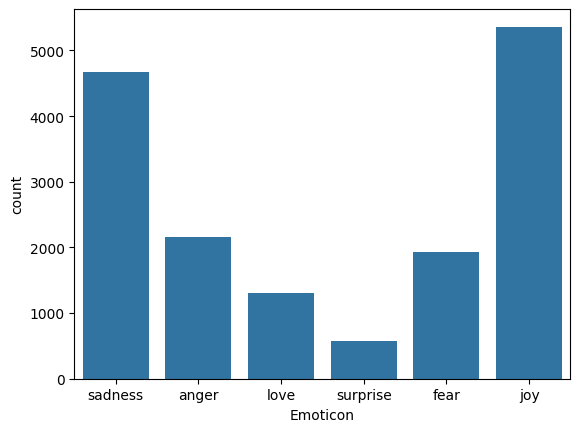

In [ ]:
sns.countplot(data = df, x= 'Emoticon')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess(text):
  doc = nlp(text)
  filtered_token = []
  for token in doc :
    if token.is_stop or token.is_punct:
      continue
    else:
      filtered_token.append(token.lemma_)
  return " ".join(filtered_token)


In [ ]:
df['processed_text'] = df['Description'].apply(preprocess)

In [ ]:
df

,Description,Emoticon,Label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1
15996,i am now turning and i feel pathetic that i am...,sadness,1
15997,i feel strong and good overall,joy,0
15998,i feel like this was such a rude comment and i...,anger,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.processed_text, df.Label_num,
                                                    test_size=0.3, random_state= 2024,
                                                    stratify =df.Label_num)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN',  KNeighborsClassifier())
])

clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1608
           1       0.78      0.86      0.82      1400
           2       0.80      0.73      0.76       648
           3       0.82      0.61      0.70       581
           4       0.76      0.55      0.64       391
           5       0.67      0.52      0.59       172

    accuracy                           0.78      4800
   macro avg       0.77      0.69      0.72      4800
weighted avg       0.78      0.78      0.78      4800



In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN',  KNeighborsClassifier())
])
clf.fit(x_train,y_train)
pred1 = clf.predict(x_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1608
           1       0.78      0.86      0.82      1400
           2       0.80      0.73      0.76       648
           3       0.82      0.61      0.70       581
           4       0.76      0.55      0.64       391
           5       0.67      0.52      0.59       172

    accuracy                           0.78      4800
   macro avg       0.77      0.69      0.72      4800
weighted avg       0.78      0.78      0.78      4800



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN',  KNeighborsClassifier())
])
clf.fit(x_train,y_train)
pred2 = clf.predict(x_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1608
           1       0.78      0.86      0.82      1400
           2       0.80      0.73      0.76       648
           3       0.82      0.61      0.70       581
           4       0.76      0.55      0.64       391
           5       0.67      0.52      0.59       172

    accuracy                           0.78      4800
   macro avg       0.77      0.69      0.72      4800
weighted avg       0.78      0.78      0.78      4800



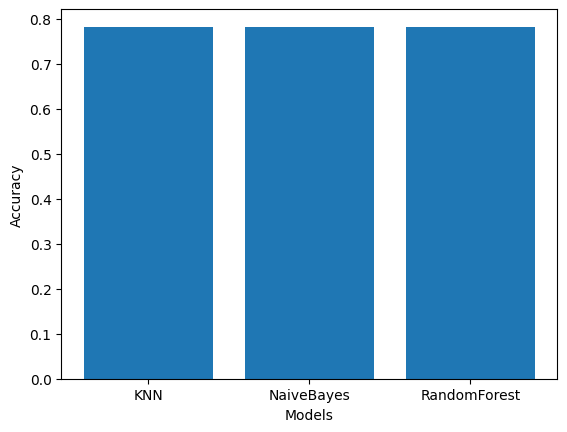

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test ,pred)
accuracy_nb = accuracy_score(y_test,pred1)
accuracy_rfc = accuracy_score(y_test,pred2)

models = ['KNN', 'NaiveBayes', 'RandomForest']
accuracy = [accuracy_knn,accuracy_nb,accuracy_rfc]
plt.bar(models,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
X_pre = df['processed_text']
y_pre = df['Label_num']
clf1 = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
     ('Random forest', RandomForestClassifier())
])
clf1.fit(X_pre,y_pre)
def predictions(sentence):
  processed_sentence = preprocess(sentence)

  emotion_label = clf.predict([processed_sentence])[0]
  emotion_mapping = {0: 'joy', 1:'sadness',2:'anger',3:'fear',4:'love',5:'surprise'}
  predicted_emotion = emotion_mapping[emotion_label]
  return predicted_emotion

In [ ]:
def get_user_input():
    feeling = input("Enter your feeling: ")
    return feeling

user_input = get_user_input()
predicted_emotion = predictions(user_input)
print(f"The predicted emotion for the feeling is: {predicted_emotion}")

Enter your feeling: He was shocked
The predicted emotion for the feeling is: surprise
